# Compute test values for RBF parameter

In [2]:
from scipy.interpolate import Rbf
import numpy as np
from matplotlib import pyplot as plt

array([0.99999999, 1.02215444, 1.03704224, 1.04658357, 1.05232959,
       1.0555025 , 1.05703598, 1.05761412, 1.05770977, 1.05762023,
       1.0575012 , 1.05739784, 1.05727216, 1.0570282 , 1.0565335 ,
       1.05563715, 1.05418473, 1.05203042, 1.04904584, 1.04512659,
       1.04019611, 1.03420771, 1.02714462, 1.0190189 , 1.00986897,
       0.99975608, 0.98876095, 0.97697989, 0.96451978, 0.9514951 ,
       0.93802364, 0.92422356, 0.91021058, 0.89609542, 0.88198282,
       0.86796961, 0.85414519, 0.8405903 , 0.82737825, 0.81457486,
       0.80224023, 0.79042854, 0.77919009, 0.76857191, 0.75861923,
       0.74937591, 0.74088519, 0.73319047, 0.72633599, 0.72036607,
       0.71532606, 0.71126198, 0.70821968, 0.7062455 , 0.70538494,
       0.70568346, 0.7071849 , 0.70993231, 0.71396743, 0.71933052,
       0.72606058, 0.73419586, 0.74377345, 0.75483021, 0.76740264,
       0.78152758, 0.79724185, 0.81458285, 0.83358751, 0.85429299,
       0.87673482, 0.90094656, 0.926958  , 0.95479321, 0.98446

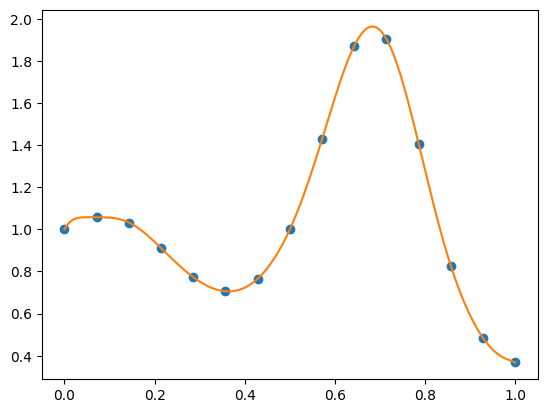

In [3]:
x = np.array([k / 14.0 for k in range(15)])
f = np.exp(x * np.cos(3.0 * x * np.pi))

rbf = Rbf(x, f, function="gaussian", epsilon=1 / 3.0)

x_out = np.array([k / 149.0 for k in range(150)])
f_interp = rbf(x_out)

plt.plot(x, f, "o")
plt.plot(x_out, f_interp, "-")

f_interp

array([0.69464463, 0.69308183, 0.69150736, 0.68992139, 0.68832406,
       0.68671551, 0.68509589, 0.68346531, 0.68182389, 0.68017171,
       0.67850888, 0.67683548, 0.67515156, 0.6734572 , 0.67175245,
       0.67003733, 0.66831189, 0.66657615, 0.66483011, 0.66307377,
       0.66130712, 0.65953014, 0.65774281, 0.65594508, 0.6541369 ,
       0.65231821, 0.65048893, 0.64864899, 0.64679829, 0.64493672,
       0.64306417, 0.64118051, 0.63928561, 0.63737931, 0.63546146,
       0.63353187, 0.63159038, 0.62963677, 0.62767084, 0.62569237,
       0.62370112, 0.62169685, 0.61967931, 0.61764821, 0.61560328,
       0.61354422, 0.61147072, 0.60938246, 0.60727911, 0.60516031,
       0.60302571, 0.60087495, 0.59870763, 0.59652337, 0.59432175,
       0.59210238, 0.58986482, 0.58760865, 0.58533341, 0.58533341,
       0.58303867, 0.58072398, 0.57838887, 0.57603288, 0.57365555,
       0.57125641, 0.568835  , 0.56639087, 0.56392355, 0.5614326 ,
       0.55891758, 0.55637805, 0.55381361, 0.55122386, 0.54860

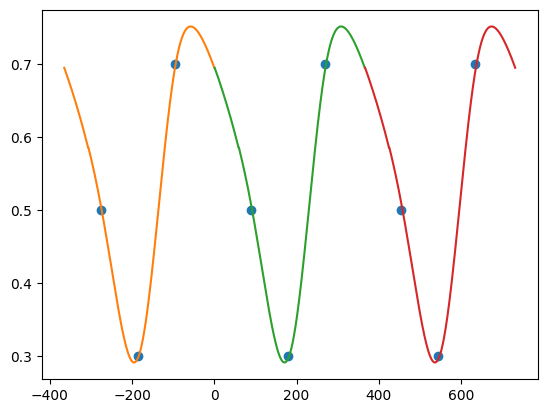

In [15]:
x = np.array([90, 180, 270])
f = np.array([0.5, 0.3, 0.7])

x = np.concatenate([x - 365, x, x + 365])
f = np.concatenate([f, f, f])

rbf = Rbf(x, f, function="multiquadric", epsilon=50.0)

x_out = np.array([k for k in range(365)])
f_interp = rbf(x_out)

f_interp = np.concatenate([f_interp[:58], [f_interp[58]], f_interp[58:]])
assert len(f_interp) == 366
x_plot = np.array([k + 1 for k in range(366)])

plt.plot(x, f, "o")
plt.plot(x_plot - 366, f_interp, "-")
plt.plot(x_plot, f_interp, "-")
plt.plot(x_plot + 366, f_interp, "-")

f_interp